Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset

data = pd.read_csv('Player_Performance.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,star_signCancer,star_signCapricorn,star_signGemini,star_signLeo,star_signLibra,star_signPisces,star_signSagittarius,star_signScopio,star_signTaurus,star_signVirgo
0,60,61,50,47,46,56,38.0,54,50.0,50,...,0,0,0,0,0,0,0,0,0,0
1,69,70,36,37,75,55,20.0,45,30.0,19,...,0,1,0,0,0,0,0,0,0,0
2,69,71,42,43,67,65,29.0,40,52.0,20,...,1,0,0,0,0,0,0,0,0,0
3,71,74,62,68,68,73,67.0,75,80.0,69,...,0,0,0,0,0,0,0,0,1,0
4,70,76,70,37,55,68,43.0,61,67.0,55,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# number of rows & columns in the dataset
data.shape

(11060, 43)

In [4]:
# checking for missing values
data.isnull().sum()

overall_rating          0
potential               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
dribbling               0
curve                   0
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
shot_power              0
jumping                 0
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning             0
vision                  0
penalties               0
marking                 0
standing_tackle         0
sliding_tackle          0
Total_Frequency         0
star_signAquarius       0
star_signAries          0
star_signCancer         0
star_signCapricorn      0
star_signGemini         0
star_signLeo            0
star_signLibra          0
star_signPis

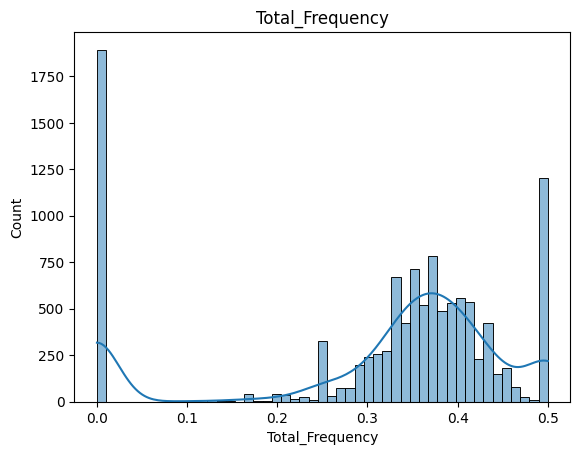

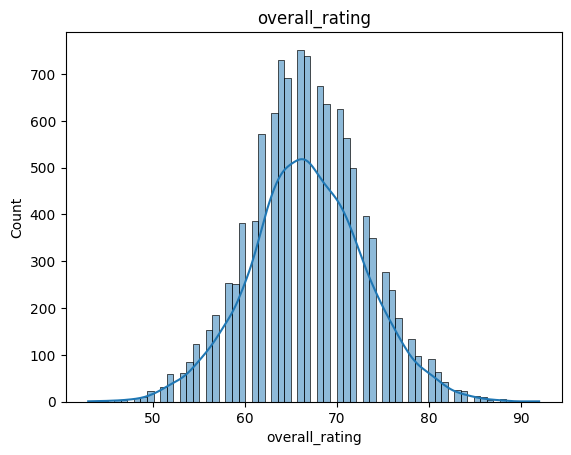

In [5]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Select features with high correlation to 'Frequency_Win' and 'Frequency_Lose'
high_correlation_threshold = 0.2
target_features = ['Total_Frequency']
high_correlation_features = correlation_matrix[target_features].abs().sort_values(by='Total_Frequency', ascending=False)
high_correlation_features = high_correlation_features[high_correlation_features['Total_Frequency'] > high_correlation_threshold].index

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the high correlation features
for feature in high_correlation_features:
    sns.histplot(data[feature], kde=True)
    plt.title(feature)
    plt.show()

In [6]:
# Features
ability_features = [
    'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy',
    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility',
    'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength',
    'long_shots', 'aggression', 'interceptions', 'positioning', 'vision',
    'penalties', 'marking', 'standing_tackle', 'sliding_tackle'
]
star_sign_features = [
    'star_signAquarius', 'star_signAries', 'star_signCancer', 'star_signCapricorn',
    'star_signGemini', 'star_signLeo', 'star_signLibra', 'star_signPisces',
    'star_signSagittarius', 'star_signScopio', 'star_signTaurus', 'star_signVirgo'
]
target_features = ['Total_Frequency']


In [7]:
# Step 2: Understanding the correlation (only for ability features)
correlation_with_win = data[ability_features].corrwith(data['Total_Frequency']).sort_values(ascending=False)

# Selecting ability features with significant correlation
significant_correlation_threshold = 0.05
significant_ability_features = correlation_with_win[correlation_with_win.abs() > significant_correlation_threshold].index

# Combining significant ability features with star sign features
X = data[significant_ability_features.tolist() + star_sign_features]
Y = data[target_features]

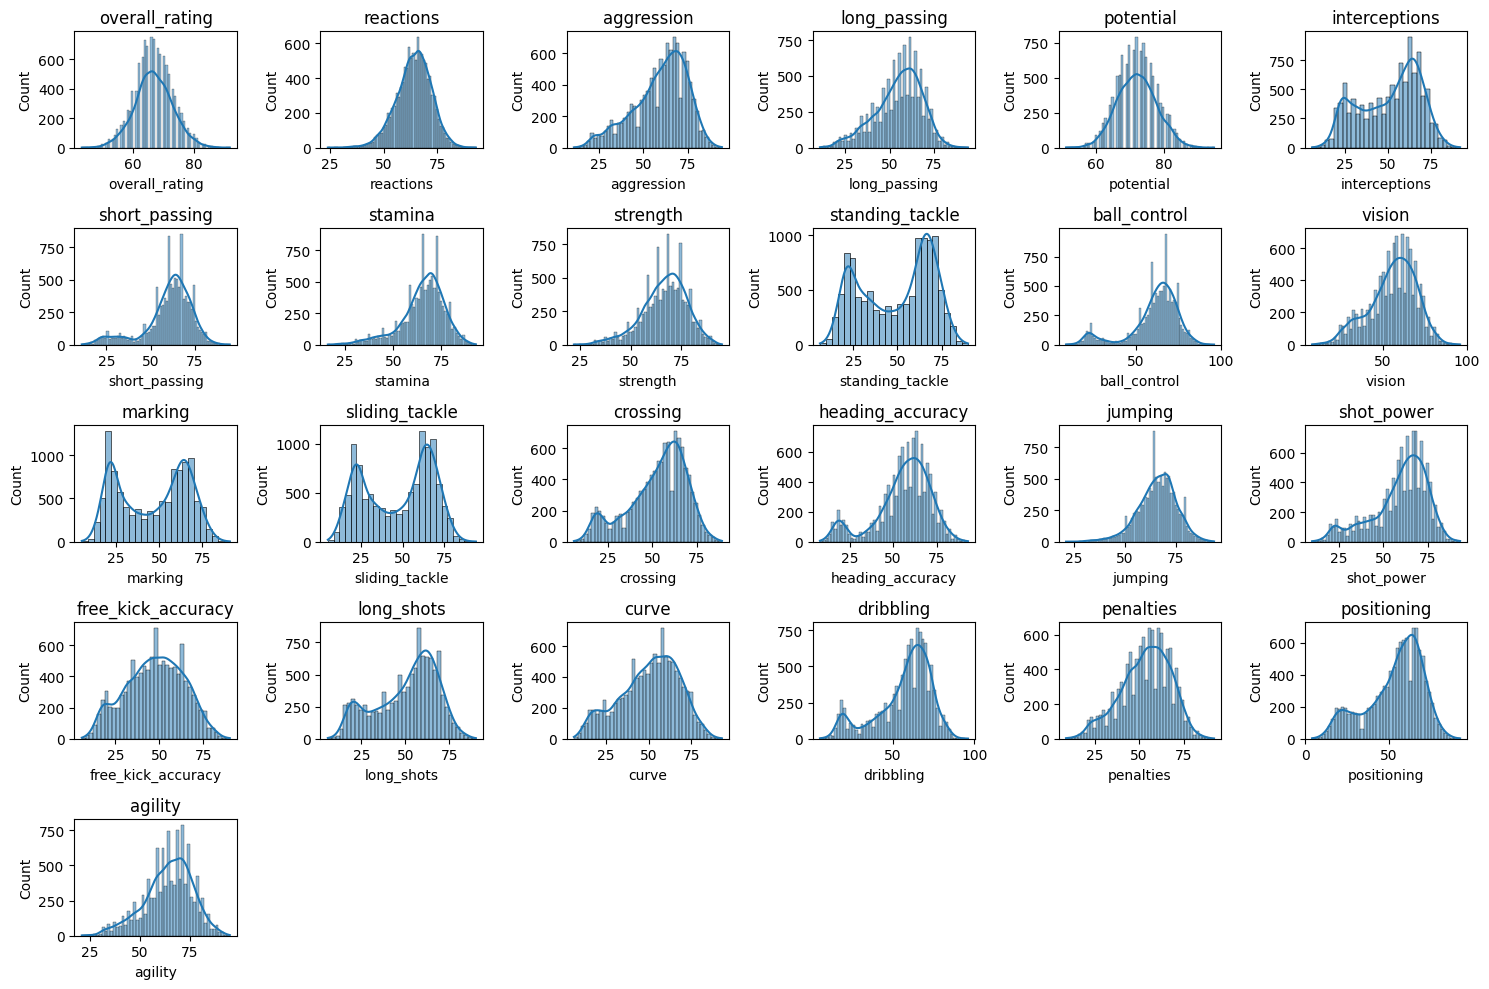

In [8]:
# Step 3: Data Visualization for significant ability features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(significant_ability_features):
    plt.subplot(5, 6, i+1)
    sns.histplot(X[feature], kde=True)
    plt.title(feature)
    plt.tight_layout()
    if i == 29:  # Limiting to 30 subplots for clarity
        break
plt.show()

In [9]:
X.columns


Index(['overall_rating', 'reactions', 'aggression', 'long_passing',
       'potential', 'interceptions', 'short_passing', 'stamina', 'strength',
       'standing_tackle', 'ball_control', 'vision', 'marking',
       'sliding_tackle', 'crossing', 'heading_accuracy', 'jumping',
       'shot_power', 'free_kick_accuracy', 'long_shots', 'curve', 'dribbling',
       'penalties', 'positioning', 'agility', 'star_signAquarius',
       'star_signAries', 'star_signCancer', 'star_signCapricorn',
       'star_signGemini', 'star_signLeo', 'star_signLibra', 'star_signPisces',
       'star_signSagittarius', 'star_signScopio', 'star_signTaurus',
       'star_signVirgo'],
      dtype='object')

In [10]:
Y.columns

Index(['Total_Frequency'], dtype='object')

In [11]:
# Step 4: Splitting the data with the updated feature set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
print(X.shape, X_train.shape, X_test.shape,Y_test.shape,Y_train.shape)

(11060, 37) (8848, 37) (2212, 37) (2212, 1) (8848, 1)


In [13]:
print(Y_train)

       Total_Frequency
480           0.333333
4635          0.437500
4067          0.336538
9984          0.400000
10265         0.000000
...                ...
5734          0.333333
5191          0.382353
5390          0.333333
860           0.387097
7270          0.500000

[8848 rows x 1 columns]


In [14]:
# Step 5: Model Training (assuming classification problem)
model = XGBRegressor()
model.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
# Step 5: Model Evaluation
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

In [16]:
# Calculating the Mean Squared Error (MSE) and R-squared (R2) score for evaluation
mse_train = mean_squared_error(Y_train, train_predictions)
mse_test = mean_squared_error(Y_test, test_predictions)
r2_train = r2_score(Y_train, train_predictions)
r2_test = r2_score(Y_test, test_predictions)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)
print("Training R2 Score:", r2_train)
print("Testing R2 Score:", r2_test)

Training MSE: 0.005652922572451883
Testing MSE: 0.02698995566494703
Training R2 Score: 0.7674294089047364
Testing R2 Score: -0.06327375897386078


In [17]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    # Add other parameters here
}

# Create the XGBRegressor model
xgb_model = XGBRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model for predictions
best_model = grid_search.best_estimator_
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

# Evaluation
print("Training R2 Score:", r2_score(Y_train, train_predictions))
print("Testing R2 Score:", r2_score(Y_test, test_predictions))


Fitting 3 folds for each of 9 candidates, totalling 27 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. C

[CV] END ....................learning_rate=0.01, max_depth=3; total time=   0.5s
[CV] END ....................learning_rate=0.01, max_depth=3; total time=   0.5s
[CV] END ....................learning_rate=0.01, max_depth=3; total time=   0.5s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is de

[CV] END ....................learning_rate=0.01, max_depth=4; total time=   0.8s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

[CV] END ....................learning_rate=0.01, max_depth=5; total time=   1.0s
[CV] END ....................learning_rate=0.05, max_depth=3; total time=   0.3s
[CV] END ....................learning_rate=0.01, max_depth=5; total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is de

[CV] END ....................learning_rate=0.05, max_depth=3; total time=   0.3s
[CV] END ....................learning_rate=0.01, max_depth=5; total time=   0.6s
[CV] END ....................learning_rate=0.05, max_depth=3; total time=   0.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

[CV] END ....................learning_rate=0.05, max_depth=4; total time=   0.7s
[CV] END ....................learning_rate=0.05, max_depth=4; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

[CV] END ....................learning_rate=0.05, max_depth=4; total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will b

[CV] END ....................learning_rate=0.05, max_depth=5; total time=   0.9s
[CV] END ....................learning_rate=0.05, max_depth=5; total time=   0.7s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

[CV] END ....................learning_rate=0.05, max_depth=5; total time=   0.7s
[CV] END .....................learning_rate=0.1, max_depth=3; total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is de

[CV] END .....................learning_rate=0.1, max_depth=3; total time=   0.5s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is de

[CV] END .....................learning_rate=0.1, max_depth=4; total time=   0.7s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is de

[CV] END .....................learning_rate=0.1, max_depth=5; total time=   0.8s
[CV] END .....................learning_rate=0.1, max_depth=5; total time=   0.7s
[CV] END .....................learning_rate=0.1, max_depth=5; total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3}
Best Score: 0.057143560684557615
Training R2 Score: 0.11525104667176822


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

Testing R2 Score: 0.04263864710251908


In [18]:
# 使用調整後的參數訓練模型
model = XGBRegressor(
    learning_rate=0.01,  # Lower learning rate
    max_depth=4,         # Slightly higher depth
    n_estimators=100,    # Reduced number of trees
    reg_alpha=0.1,       # L1 regularization
    reg_lambda=0.1,      # L2 regularization
    random_state=42
)
model.fit(X_train, Y_train)

# 進行預測
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# 計算 MSE 和 R2 分數
mse_train = mean_squared_error(Y_train, train_predictions)
mse_test = mean_squared_error(Y_test, test_predictions)
r2_train = r2_score(Y_train, train_predictions)
r2_test = r2_score(Y_test, test_predictions)

# 打印結果
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)
print("Training R2 Score:", r2_train)
print("Testing R2 Score:", r2_test)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

Training MSE: 0.022278733227050224
Testing MSE: 0.02449075937900482
Training R2 Score: 0.08341604027641913
Testing R2 Score: 0.03518249128291406


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be 

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# 保存列名
feature_names = X.columns

# 數據預處理 - 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割數據
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# 建立模型並調整參數
model = XGBRegressor(n_estimators=100, max_depth=3, reg_lambda=1, random_state=42)

# 交叉驗證
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
print("Cross-validated R2 scores:", scores)

# 訓練模型
model.fit(X_train, Y_train, early_stopping_rounds=10, eval_set=[(X_test, Y_test)], verbose=False)

# 模型評估
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
mse_train = mean_squared_error(Y_train, train_predictions)
mse_test = mean_squared_error(Y_test, test_predictions)
r2_train = r2_score(Y_train, train_predictions)
r2_test = r2_score(Y_test, test_predictions)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)
print("Training R2 Score:", r2_train)
print("Testing R2 Score:", r2_test)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is de

Cross-validated R2 scores: [0.03712244 0.02810007 0.01766201 0.03576313 0.02664085]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is de

Training MSE: 0.020946901877837914
Testing MSE: 0.024365415118420396
Training R2 Score: 0.1382097863706916
Testing R2 Score: 0.04012044912070678


In [20]:
# 獲取特徵重要性
feature_importances = model.feature_importances_

# 將特徵重要性和特徵名稱組合成 DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 打印特徵重要性
print(importance_df)

                 Feature  Importance
0         overall_rating    0.129309
7                stamina    0.070868
18    free_kick_accuracy    0.048745
4              potential    0.044181
13        sliding_tackle    0.042252
17            shot_power    0.040652
21             dribbling    0.036696
2             aggression    0.035255
6          short_passing    0.034729
34       star_signScopio    0.033114
3           long_passing    0.032979
11                vision    0.032894
24               agility    0.032262
9        standing_tackle    0.031985
19            long_shots    0.031142
23           positioning    0.030999
20                 curve    0.030796
12               marking    0.030478
10          ball_control    0.029637
5          interceptions    0.029044
14              crossing    0.026582
29       star_signGemini    0.026097
15      heading_accuracy    0.024734
1              reactions    0.024587
8               strength    0.023153
22             penalties    0.022370
1

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train)
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)
rf_mse_train = mean_squared_error(Y_train, rf_train_predictions)
rf_mse_test = mean_squared_error(Y_test, rf_test_predictions)
rf_r2_train = r2_score(Y_train, rf_train_predictions)
rf_r2_test = r2_score(Y_test, rf_test_predictions)
print("Random Forest Training MSE:", rf_mse_train)
print("Random Forest Testing MSE:", rf_mse_test)
print("Random Forest Training R2 Score:", rf_r2_train)
print("Random Forest Testing R2 Score:", rf_r2_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Training MSE: 0.003232721074378106
Random Forest Testing MSE: 0.024720148368782814
Random Forest Training R2 Score: 0.8670005043447584
Random Forest Testing R2 Score: 0.02614567416263891


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Adjusted RandomForestRegressor model
adjusted_rf_model = RandomForestRegressor(
    n_estimators=500,     # Increased number of trees
    max_depth=10,         # Limited max depth
    min_samples_leaf=4,   # Minimum samples per leaf
    min_samples_split=8,  # Minimum samples for a split
    max_features='sqrt',  # Feature bagging
    random_state=42
)

# Fit the adjusted model to the training data
adjusted_rf_model.fit(X_train, Y_train)

# Predictions
adjusted_train_predictions = adjusted_rf_model.predict(X_train)
adjusted_test_predictions = adjusted_rf_model.predict(X_test)

# Calculating MSE and R2 score for the adjusted model
adjusted_mse_train = mean_squared_error(Y_train, adjusted_train_predictions)
adjusted_mse_test = mean_squared_error(Y_test, adjusted_test_predictions)
adjusted_r2_train = r2_score(Y_train, adjusted_train_predictions)
adjusted_r2_test = r2_score(Y_test, adjusted_test_predictions)

# Printing results
print("Adjusted Random Forest Training MSE:", adjusted_mse_train)
print("Adjusted Random Forest Testing MSE:", adjusted_mse_test)
print("Adjusted Random Forest Training R2 Score:", adjusted_r2_train)
print("Adjusted Random Forest Testing R2 Score:", adjusted_r2_test)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Adjusted Random Forest Training MSE: 0.017126850896356186
Adjusted Random Forest Testing MSE: 0.024177922338191823
Adjusted Random Forest Training R2 Score: 0.2953730065263678
Adjusted Random Forest Testing R2 Score: 0.04750675814947647


In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, Y_train)

ridge_train_predictions = ridge_model.predict(X_train)
ridge_test_predictions = ridge_model.predict(X_test)

ridge_mse_train = mean_squared_error(Y_train, ridge_train_predictions)
ridge_mse_test = mean_squared_error(Y_test, ridge_test_predictions)
ridge_r2_train = r2_score(Y_train, ridge_train_predictions)
ridge_r2_test = r2_score(Y_test, ridge_test_predictions)

print("Ridge Regression Training MSE:", ridge_mse_train)
print("Ridge Regression Testing MSE:", ridge_mse_test)
print("Ridge Regression Training R2 Score:", ridge_r2_train)
print("Ridge Regression Testing R2 Score:", ridge_r2_test)

Ridge Regression Training MSE: 0.02256772757754533
Ridge Regression Testing MSE: 0.02437328286899031
Ridge Regression Training R2 Score: 0.071526334366528
Ridge Regression Testing R2 Score: 0.03981049778818169


In [25]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that first standardizes the data then applies Ridge regression
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=0.1, random_state=42))

# Fit the model to the training data
pipeline.fit(X_train, Y_train)

# Predictions
ridge_train_predictions = pipeline.predict(X_train)
ridge_test_predictions = pipeline.predict(X_test)

# Calculating MSE and R2 score
ridge_mse_train = mean_squared_error(Y_train, ridge_train_predictions)
ridge_mse_test = mean_squared_error(Y_test, ridge_test_predictions)
ridge_r2_train = r2_score(Y_train, ridge_train_predictions)
ridge_r2_test = r2_score(Y_test, ridge_test_predictions)

# Printing results
print("Adjusted Ridge Regression Training MSE:", ridge_mse_train)
print("Adjusted Ridge Regression Testing MSE:", ridge_mse_test)
print("Adjusted Ridge Regression Training R2 Score:", ridge_r2_train)
print("Adjusted Ridge Regression Testing R2 Score:", ridge_r2_test)


Adjusted Ridge Regression Training MSE: 0.022567727188835977
Adjusted Ridge Regression Testing MSE: 0.024373400651410044
Adjusted Ridge Regression Training R2 Score: 0.07152635035867405
Adjusted Ridge Regression Testing R2 Score: 0.03980585773031253


In [26]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Create a pipeline for standardization and SVR
pipeline = make_pipeline(StandardScaler(), SVR())

# Fit the model to the training data
pipeline.fit(X_train, Y_train.values.ravel())  # Ensure Y_train is in the correct format

# Predictions
train_predictions = pipeline.predict(X_train)
test_predictions = pipeline.predict(X_test)

# Calculate MSE and R2 score
mse_train = mean_squared_error(Y_train, train_predictions)
mse_test = mean_squared_error(Y_test, test_predictions)
r2_train = r2_score(Y_train, train_predictions)
r2_test = r2_score(Y_test, test_predictions)

# Print results
print("SVR Training MSE:", mse_train)
print("SVR Testing MSE:", mse_test)
print("SVR Training R2 Score:", r2_train)
print("SVR Testing R2 Score:", r2_test)


SVR Training MSE: 0.014805698624069618
SVR Testing MSE: 0.02729480360822567
SVR Training R2 Score: 0.39086905287565565
SVR Testing R2 Score: -0.07528329402420186


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, Y_train.values.ravel())
gbr_train_predictions = gbr_model.predict(X_train)
gbr_test_predictions = gbr_model.predict(X_test)

print("Gradient Boosting Regressor Training MSE:", mean_squared_error(Y_train, gbr_train_predictions))
print("Gradient Boosting Regressor Testing MSE:", mean_squared_error(Y_test, gbr_test_predictions))
print("Gradient Boosting Regressor Training R2 Score:", r2_score(Y_train, gbr_train_predictions))
print("Gradient Boosting Regressor Testing R2 Score:", r2_score(Y_test, gbr_test_predictions))

Gradient Boosting Regressor Training MSE: 0.020428108918597938
Gradient Boosting Regressor Testing MSE: 0.024493928150955076
Gradient Boosting Regressor Training R2 Score: 0.1595537873967252
Gradient Boosting Regressor Testing R2 Score: 0.0350576569888269
